# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 📥 Step 1: Load the Dataset

In [2]:
try:
    df = pd.read_csv("Cancer_Data.csv")
except FileNotFoundError:
    print("Error: 'Cancer_Data.csv' not found.")
    exit()


## 🔍 Step 2: Explore the Dataset

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [6]:
df = df.drop(['Unnamed: 32', 'id'], axis=1, errors='ignore')
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
else:
    print("No 'diagnosis' column")
    exit()
print(df.head())
print(df.isnull().sum())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

## 📊 Step 4: Visualize the Data

/tmp/ipython-input-7-481126132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=['skyblue', 'salmon'])


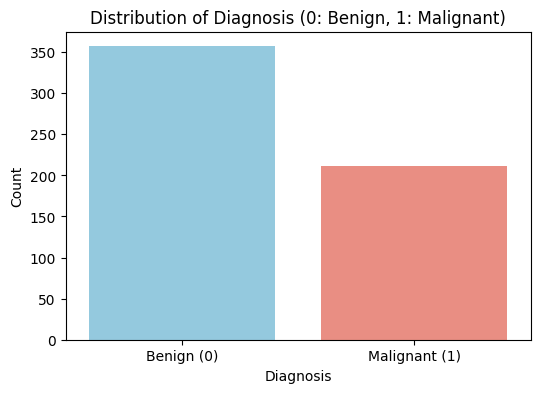


--- Histograms for Selected Features: radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean ---


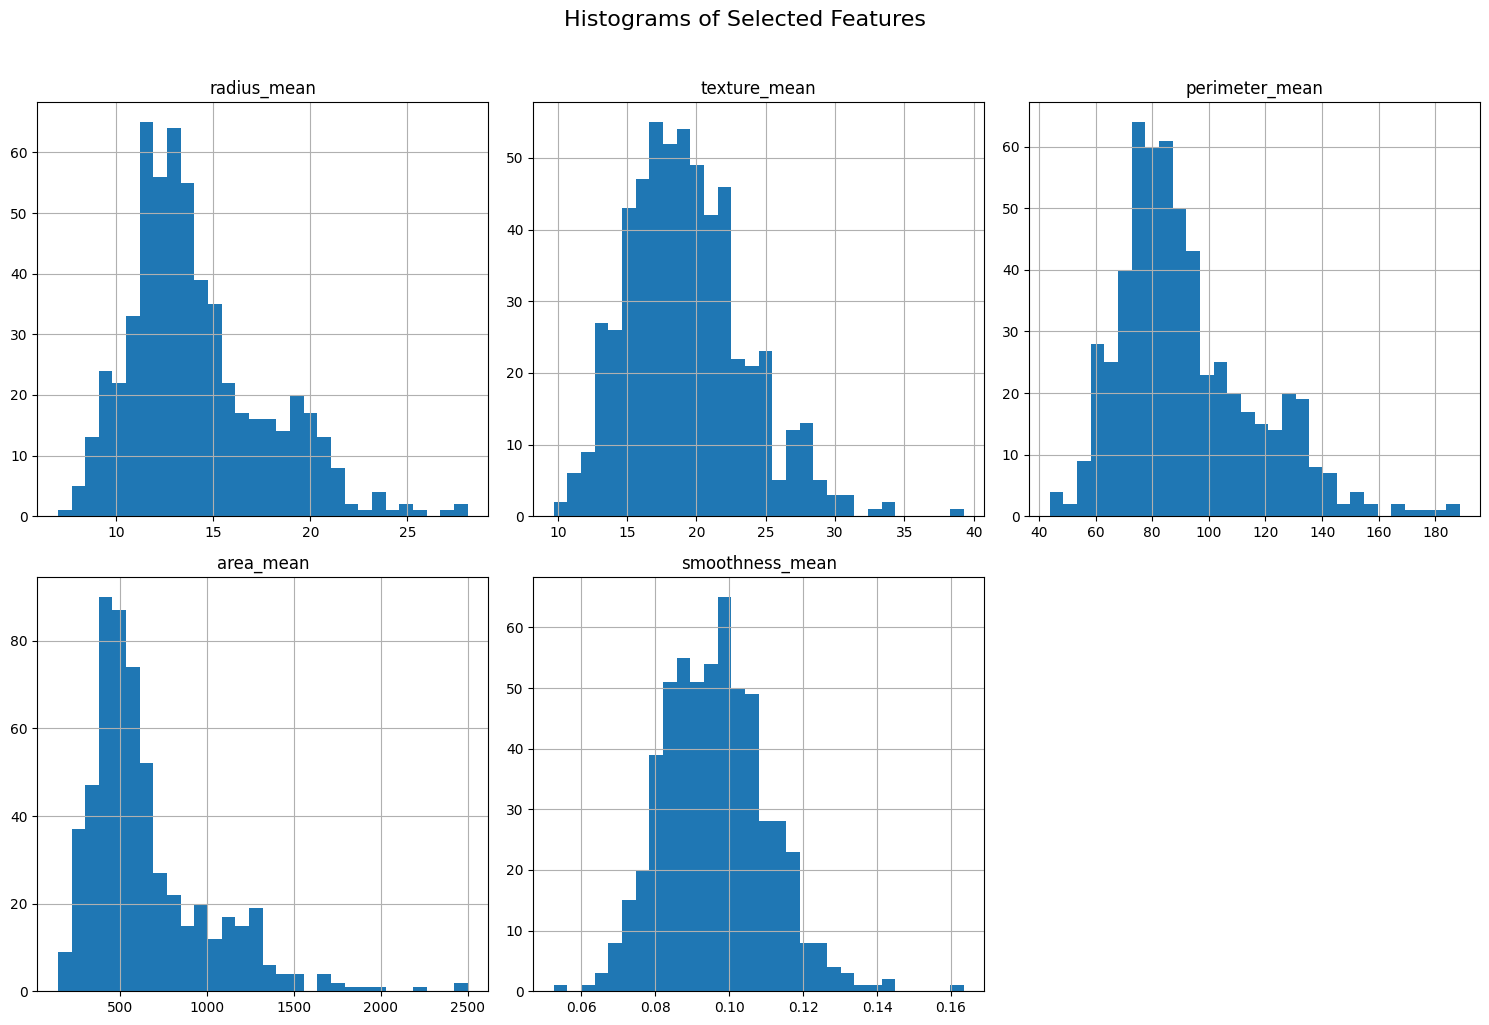


--- Box Plots for Selected Features vs. Diagnosis: radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean ---


/tmp/ipython-input-7-481126132.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette=['skyblue', 'salmon'])


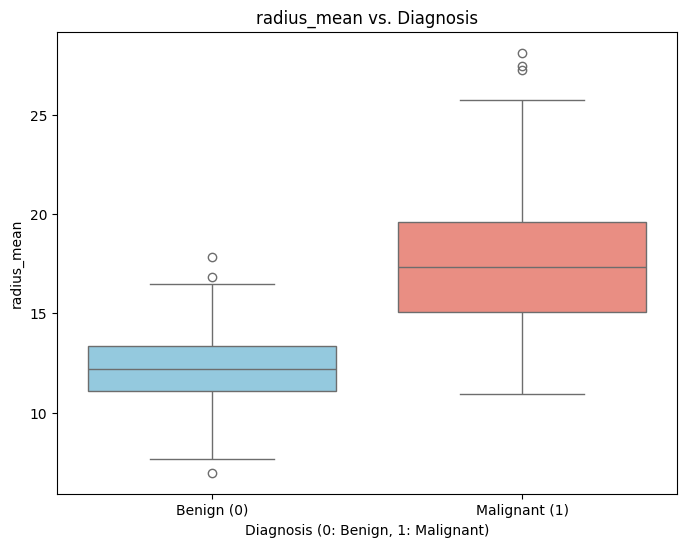

/tmp/ipython-input-7-481126132.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette=['skyblue', 'salmon'])


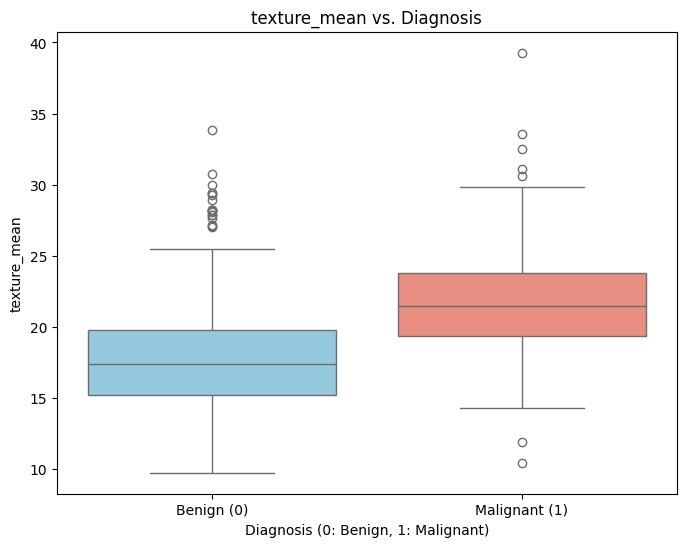

/tmp/ipython-input-7-481126132.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette=['skyblue', 'salmon'])


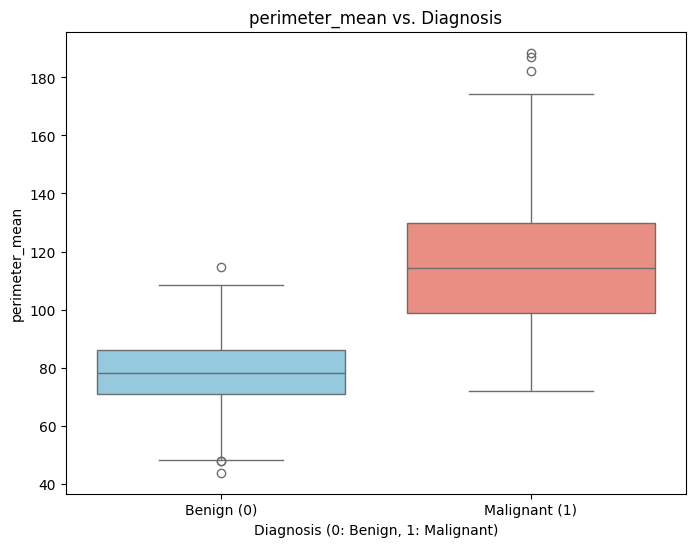

/tmp/ipython-input-7-481126132.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette=['skyblue', 'salmon'])


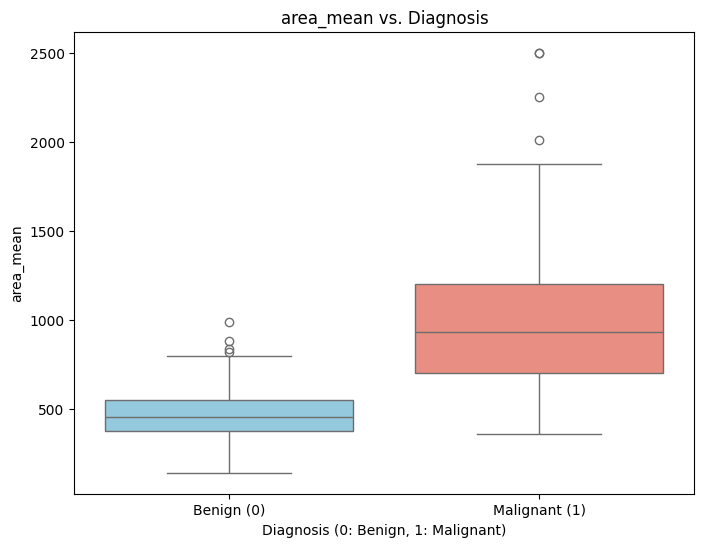

/tmp/ipython-input-7-481126132.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette=['skyblue', 'salmon'])


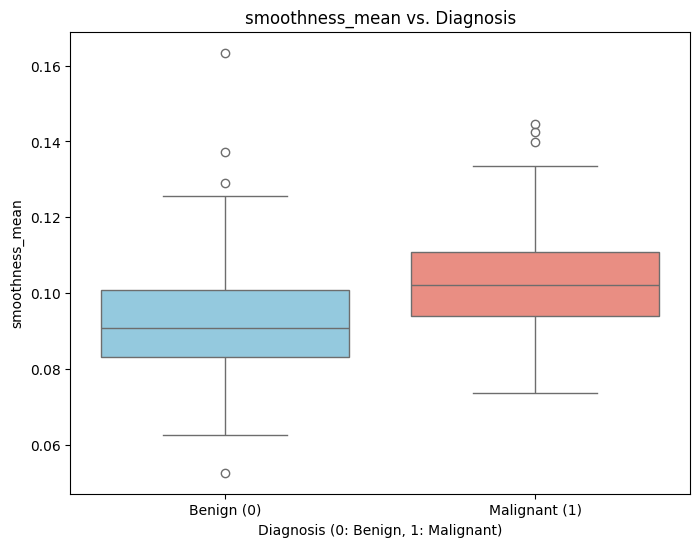

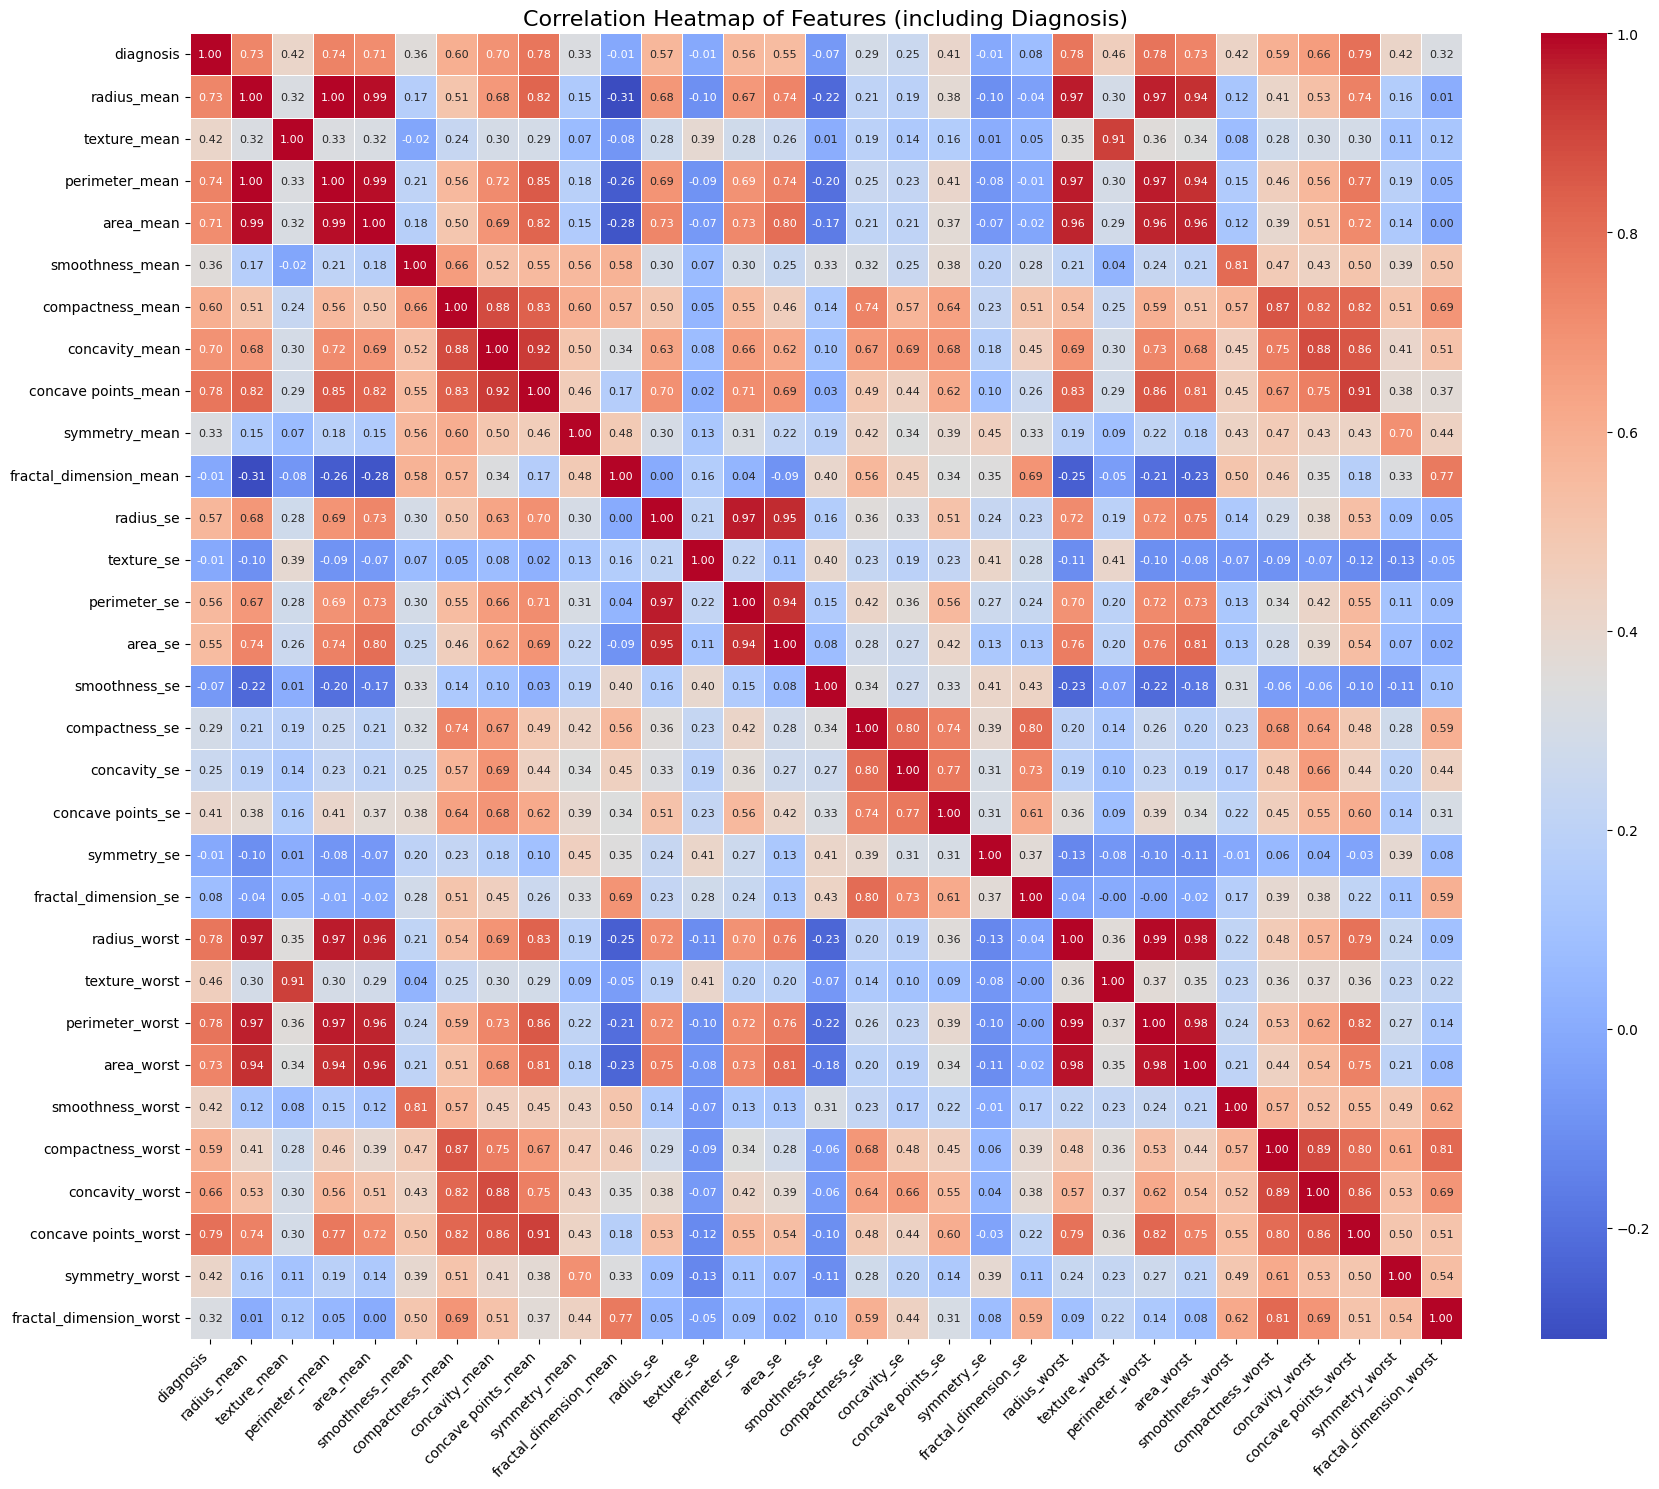

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribution of Diagnosis (0: Benign, 1: Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

features_to_visualize = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
features_present = [col for col in features_to_visualize if col in df.columns]

if not features_present:
    print("Warning: None of the selected features for visualization (radius_mean, texture_mean, etc.) are in the DataFrame.")
else:
    print(f"\n--- Histograms for Selected Features: {', '.join(features_present)} ---")
    df[features_present].hist(bins=30, figsize=(15, 10), layout=(2, 3))
    plt.suptitle('Histograms of Selected Features', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"\n--- Box Plots for Selected Features vs. Diagnosis: {', '.join(features_present)} ---")
    for feature in features_present:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='diagnosis', y=feature, data=df, palette=['skyblue', 'salmon'])
        plt.title(f'{feature} vs. Diagnosis')
        plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
        plt.ylabel(feature)
        plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
        plt.show()

plt.figure(figsize=(18, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap of Features (including Diagnosis)', fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## ⚙️ Step 5: Preprocess the Data

In [8]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Step 6: Train a Machine Learning Model

In [9]:
print("\n--- Initial Model Training (Without Hyperparameter Tuning) ---")
initial_model = LogisticRegression(random_state=42, max_iter=10000)
initial_model.fit(X_train_scaled, y_train)

print("\n--- Model Optimization with GridSearchCV ---")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=10000),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_



--- Initial Model Training (Without Hyperparameter Tuning) ---

--- Model Optimization with GridSearchCV ---


## 🧪 Step 7: Evaluate the Model

In [10]:
print("\n--- Evaluating Initial Model ---")
y_pred_initial = initial_model.predict(X_test_scaled)
print("Initial Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_initial))
print("\nInitial Model Classification Report:")
print(classification_report(y_test, y_pred_initial))
initial_accuracy = accuracy_score(y_test, y_pred_initial)
print("\nInitial Model Accuracy Score:", initial_accuracy)

print("\n--- Evaluating Optimized Model ---")
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("\nBest Cross-validation Accuracy Score (from GridSearchCV):")
print(grid_search.best_score_)
y_pred_optimized = best_model.predict(X_test_scaled)
print("\nOptimized Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))
print("\nOptimized Model Classification Report:")
print(classification_report(y_test, y_pred_optimized))
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print("\nOptimized Model Accuracy Score:", optimized_accuracy)

print(f"\nAccuracy Improvement: {optimized_accuracy - initial_accuracy:.4f}")
if optimized_accuracy > initial_accuracy:
    print("The model accuracy improved with hyperparameter tuning.")
elif optimized_accuracy == initial_accuracy:
    print("Hyperparameter tuning resulted in the same accuracy.")
else:
    print("Hyperparameter tuning resulted in slightly lower accuracy on this test set split.")

print("\nNote: The 'Cancer_Data.csv' file must be in the same directory as this script.")



--- Evaluating Initial Model ---
Initial Model Confusion Matrix:
[[70  1]
 [ 2 41]]

Initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Initial Model Accuracy Score: 0.9736842105263158

--- Evaluating Optimized Model ---

Best Parameters found by GridSearchCV:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Best Cross-validation Accuracy Score (from GridSearchCV):
0.9780219780219781

Optimized Model Confusion Matrix:
[[71  0]
 [ 1 42]]

Optimized Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                         

## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy